# Lagrangean Relaxation

Maira Zabuscha de Lima 21008214

In [1]:
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [2]:
def solve(X):
    C = []
    for i in range(n):
        C.append(c[i])
        for row in columns[i]:
            C[i] -= LAMBDA[row]

    z = 0
    for i in range(n):
        if C[i] <= 0:
            X[i] = 1
            z += C[i]
        else:
            X[i] = 0

    for i in range(m):
        z += LAMBDA[i]
    return z

In [3]:
def optimisation(X):
    G = [1 for b in range(m)]
    for i in range(n):
        for row in columns[i]:
            G[row] -= X[i]

    S = 0
    for g in G:
        S += g * g
    
    T = PI * (Z_UB - Z_LB) / S

    for i in range(m):
        LAMBDA[i] += T * G[i]
        if LAMBDA[i] < 0:
            LAMBDA[i] = 0

In [4]:
def make_feasible(X):
    rows = [0 for b in range(m)]
    for i in range(n):
        if X[i] == 1:
            for row in columns[i]:
                rows[row] = 1
    for i in indices:
        for row in columns[i]:
            if rows[row] == 0:
                rows[row] = 1
                X[i] = 1
    z = 0
    for i in range(n):
        if X[i] == 1:
            z += c[i]
    return z

In [5]:
# read file's contents
f= open("scp-n8661_m106-aa03.txt",'r')

[f.readline() for l in range(10)] # skip 10 lines
o = int(f.readline().split()[1])
n, m = list(map(int, f.readline().split()))
display(Math(f'o = {o}'))
display(Math(f'n = {n}'))
display(Math(f'm = {m}'))

# populate list of costs
c = []
while len(c) < n:
    c += list(map(int, f.readline().split()))

# populate list of rows in each column
columns = []
for i in range(n):
    column = list(map(int, f.readline().split()))[1:]
    columns.append([b-1 for b in column])

f.close()

# indices in order of cost
indices = [i[0] for i in sorted(enumerate(c), key=lambda x:x[1])]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
# Lagrangean parameters
PI = 0.004
l = 124
LAMBDA = [l for x in range(m)]

# temp solutions
X_LB = [0 for b in range(n)]
X_UB = [0 for b in range(n)]

# determine Z_LB
Z_LB = solve(X_LB)

# determine Z_UB
Z_UB = make_feasible(X_UB)

# initial solution
x = [b for b in X_UB]

display(Math('Z_{LB} = '+f'{Z_LB:.0f}'))
display(Math('Z_{UB} = '+f'{Z_UB}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# Lagrangean heuristic
Z_MAX = Z_LB
Z_MIN = Z_UB

# lists for the chart
Z_LB_list = []
Z_MAX_list = []
Z_MIN_list = []
Z_LB_list.append(Z_LB)
Z_MAX_list.append(Z_MAX)
Z_MIN_list.append(Z_MIN)

i = 1
while i < 10000 and Z_MAX < o and Z_MIN > o:
    optimisation(X_LB)
    Z_LB = solve(X_LB)
    if Z_LB > Z_MAX:
        Z_MAX = Z_LB
        X_UB = [b for b in X_LB]
        Z_UB = make_feasible(X_UB)
        if Z_UB < Z_MIN:
            Z_MIN = Z_UB
            x = [b for b in X_UB]
    Z_LB_list.append(Z_LB)
    Z_MAX_list.append(Z_MAX)
    Z_MIN_list.append(Z_MIN)
    i += 1

display(Math('Z_{MAX} = '+f'{Z_MAX:.0f}'))
display(Math('Z_{MIN} = '+f'{Z_MIN:.0f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

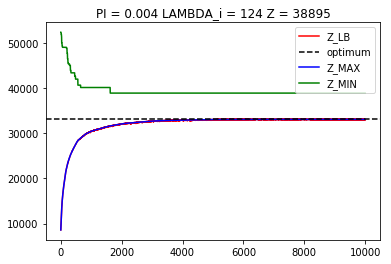

In [8]:
line_zlb, = plt.plot(range(i), Z_LB_list, 'r', label='Z_LB')
line_zmax, = plt.plot(range(i), Z_MAX_list, 'b', label='Z_MAX')
line_zmin, = plt.plot(range(i), Z_MIN_list, 'g', label='Z_MIN')
line_optimum = plt.axhline(y=o, xmin=0.0, xmax=1.0, color='k', ls='--', label='optimum')
plt.legend(handles=[line_zlb, line_optimum, line_zmax, line_zmin])
plt.title(f'PI = {PI} LAMBDA_i = {l} Z = {Z_MIN}')
plt.show()

Após 10000 iterações, o valor do Lower Bound aumenta muito lentamente. Após aproximadamente 11000000 de itereações, o valor subiu apenas de 33071 para 33074, produzindo uma solução final com o mesmo valor.